In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mchmm import (FullMCHMM, KnownLatentMCHMM)
from mchmm.mchmm import Monitor
from mchmm.known_latent_initializer.initializer_func import initializer_generator as latent_generator
import mchmm.latent_update_fitter as fwl
from mchmm.latent_update_fitter import \
    (fit_model_with_external, get_initial_model, fit_model_without_external, plot_single)
with open("load_macro_data.py") as f:
    exec(f.read())

In [3]:
mdata.columns[0]

'Income'

In [ ]:
num_states = 2
k = 1
margin_initializer, hmm_initializer, serial_dependence_initializer, \
    cross_sectional_initializer, _ = latent_generator(
        k, num_states, data, latent_seq)
model = KnownLatentMCHMM(k, num_states,
            margin_initializer=margin_initializer,
            hmm_initializer=hmm_initializer,
            serial_dependence_initializer=serial_dependence_initializer,
            cross_sectional_initializer=cross_sectional_initializer)
model.neg_log_likelihood(data, latent_seq, False)
model.constrained_fit(data, latent_seq, 5)

In [5]:
num_states = 2
models_with_latents = []
for k in range(6):
    if k == 0:
        margin_initializer, hmm_initializer, serial_dependence_initializer, \
            cross_sectional_initializer, _ = latent_generator(
                1, num_states, data, latent_seq)
        model = KnownLatentMCHMM(1, num_states,
                    margin_initializer=margin_initializer,
                    hmm_initializer=hmm_initializer,
                    cross_sectional_initializer=cross_sectional_initializer)
        model.neg_log_likelihood(data, latent_seq, False)
        model.unconstrained_fit(data, latent_seq, 4)
    if k > 0:
        margin_initializer, hmm_initializer, serial_dependence_initializer, \
            cross_sectional_initializer, _ = latent_generator(
                k, num_states, data, latent_seq)
        model = KnownLatentMCHMM(k, num_states,
                    margin_initializer=margin_initializer,
                    hmm_initializer=hmm_initializer,
                    serial_dependence_initializer=serial_dependence_initializer,
                    cross_sectional_initializer=cross_sectional_initializer)
        model.neg_log_likelihood(data, latent_seq, False)
        model.constrained_fit(data, latent_seq, 5)
    models_with_latents.append(model)

In [18]:
models_with_latents[0].complete_monitor.n_par = 47

In [59]:
from tabulate import tabulate
table_likelihood = [
    ['Markov order'] + [str(i) for i in range(6)],
    [r'With correlation when regmies switch'] + [model.complete_monitor.loglik for model in models_with_latents]
]
table_aic = [
    ['Markov order'] + [str(i) for i in range(6)],
    [r'With correlation when regmies switch'] + [model.complete_monitor.aic() for model in models_with_latents]
]
print('\nTable of loglik values:')
print(tabulate(table_likelihood[1:], table_likelihood[0], tablefmt="github"))
print('\nTable of AIC values:')
print(tabulate(table_aic[1:], table_aic[0], tablefmt="latex"))


Table of loglik values:
| Markov order                         |        0 |        1 |        2 |        3 |        4 |       5 |
|--------------------------------------|----------|----------|----------|----------|----------|---------|
| With correlation when regmies switch | -1894.79 | -1843.06 | -1827.91 | -1809.24 | -1802.48 | -1797.1 |

Table of AIC values:
\begin{tabular}{lrrrrrr}
\hline
 Markov order                         &       0 &       1 &       2 &       3 &       4 &      5 \\
\hline
 With correlation when regmies switch & 3883.59 & 3804.13 & 3789.81 & 3768.47 & 3770.97 & 3776.2 \\
\hline
\end{tabular}


In [61]:
#%% Estimation with external information
all_seq_info = {}
all_model_info = {}
for j in np.linspace(0.6, 0.8, 3):
    update_seq_info, update_model_info = fit_model_with_external(data, 3, latent_seq, cp=j)
    all_seq_info[str(j)] = update_seq_info
    all_model_info[str(j)] = update_model_info

c:\Users\Levin\anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
c:\Users\Levin\anaconda3\lib\site-packages\autograd\numpy\numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
c:\Users\Levin\anaconda3\lib\site-packages\autograd\core.py:212: RuntimeWarning: invalid value encountered in add
  def _add(self, x, y):        return x + y
c:\Users\Levin\anaconda3\lib\site-packages\autograd\core.py:213: RuntimeWarning: invalid value encountered in add
  def _mut_add(self, x, y):    x += y; return x
c:\Users\Levin\anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
c:\Users\Levin\anaconda3\lib\site-packages\autograd\numpy\numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
c:\Users

In [81]:
def plot_single(date_index, arr, plot_value, show_value, color, linestyle, ax):
    show_value -= len(np.unique(arr)) // 2 * 0.1
    index = np.where(arr[:-1] != arr[1:])[0]+1
    index = index.tolist()
    index = [0] + index + [len(arr)+1]
    for i in range(len(index)-1):
        start, end = index[i:(i+2)]
        value = arr[start]
        if value == plot_value:
            plot_index = date_index[start:end]
            ax.plot(plot_index,
                    [show_value+0.1*value]*len(plot_index),
                    color=color,
                    linestyle=linestyle,
                    linewidth=3)

UnboundLocalError: local variable 'show_value' referenced before assignment

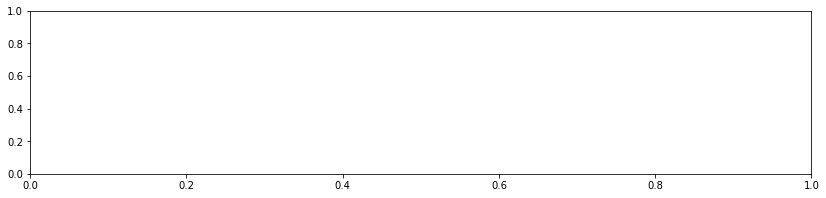

In [84]:
import matplotlib.lines as mlines
color_dict = {
    'red': "#d62728",
    'blue': "#1f77b4",
    'orange': "#ff7f0e"
}
dash_list = ['-', '--', ':']
legend_lines = [
    mlines.Line2D([], [], color="#d62728", 
                  linestyle='-', label='Recession', linewidth=3),
    mlines.Line2D([], [], color="#1f77b4", 
                  linestyle='--', label='Expansion', linewidth=3),
]

y_labels = []
fig, ax = plt.subplots(figsize=(14, 3))
count = 0
for gamma, seq_info in list(all_seq_info.items())[-1:]:
    y_labels.append(r'$\xi$ = '+str(gamma))
    plot_single(date_index, np.array(seq_info[-1]), 0, color='red', linestyle=':', ax=ax)
    count += 1

ax.set(ylim=(-0.15, count-0.95),
        yticks=[],
        yticklabels=[],
        xlabel='Years')
ax.legend(handles=legend_lines)
ax.set_xlim([-3800, 18400])
ax.fill_between(date_index, -0.5, count-0.5, where=(latent_seq==0), color='green', alpha=0.5)
fig.tight_layout()
fig.savefig(f'simulation_plots//known_latents.pdf')